In [1]:
## Implementation of ANN using keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [7]:
### checking the version of tensorflow and keras
print(f"tensorflow version {tf.__version__}")
print(f"keras version{tf.keras.__version__}")

tensorflow version 2.17.0
keras version3.5.0


In [3]:
## gpu/cpu check
tf.config.list_physical_devices("GPU")

[]

In [4]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
check_list=["GPU","CPU"]

for device in check_list:
    out=tf.config.list_physical_devices(device)
    if len(out)>0:
        print(f"{device} is available")
    else:
        print(f"{device} is not available")

GPU is not available
CPU is available


In [6]:
### we want to create a classifier using keras and tensorflow


## Creating a simpler classifier using keras on MNIST data

In [8]:
mnist=tf.keras.datasets.mnist

In [9]:
mnist

<module 'keras.api.datasets.mnist' from 'C:\\Users\\chinm\\AppData\\Roaming\\Python\\Python312\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [10]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()

In [11]:
x_train.shape
## our each image is the matrix of(28*28)
## ek square matrix haing 28*28 elements,each element rainging between 0 to 255

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

In [14]:
 ## mnist data-hand written digits rangling from 0 to 9

In [13]:
## if i want to see the one image
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
##create the validation datset from the full training data
## scale the data between 0 to 1 ,deviding by 255
x_valid,x_train=x_train[:5000]/255,x_train[5000:]/255
y_valid,y_train=y_train[:5000] ,y_train[5000:]

## scale the test data as well
x_test=x_test/255

In [15]:
len(x_train)

55000

In [16]:
len(x_valid)

5000

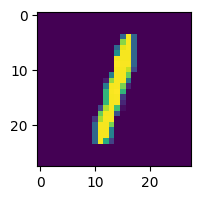

In [17]:
## visually show the first image
plt.figure(figsize=(15,2))
plt.imshow(x_train[23])
plt.show()

<Axes: >

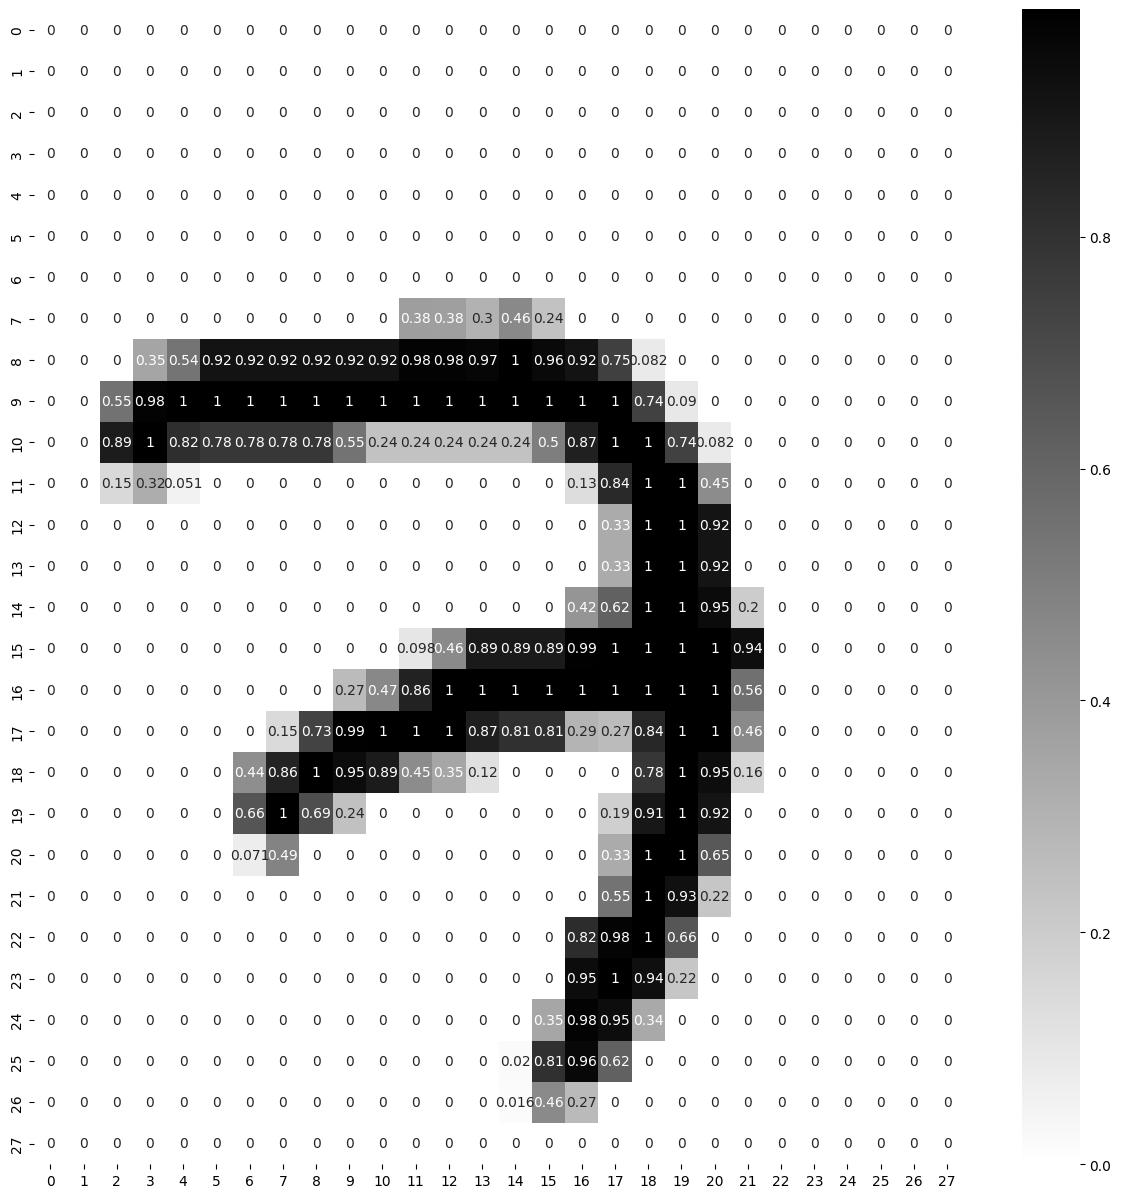

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],annot=True,cmap="binary")

In [28]:
### here this is the multiclass classification problem ,so we use softmax as activation function

In [20]:
### first we flatten the input layers --
## because our input is in 2d ,first we should flatten it
28*28

784

In [21]:
## creating layers in ANN
LAYERS=[tf.keras.layers.Flatten(input_shape=(28,28),name="inputLayer"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="outputLayers")]
model_clf=tf.keras.models.Sequential(LAYERS)

C:\Users\chinm\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayers, built=True>]

In [23]:
784*300+300 
## 784-input param term
## 300-no first hiden layer neuron
## we add biasing term on each of the neuron that is present in the first hiden layer

235500

In [24]:
300*100+100

30100

In [25]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayers (Dense)                 │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
## first layer+second layer+bias
784*300+300,300*100+100,100*10+10

(235500, 30100, 1010)

In [27]:
### total parameters to be trained
sum((235500, 30100, 1010))

266610

In [28]:
### difreent diffrent layers

hidden1=model_clf.layers[1]
hidden2=model_clf.layers[2]
print(hidden1.name)
print(hidden2.name)

hiddenLayer1
hiddenLayer2


In [46]:
hidden1.get_weights()

### this is the initialized weights and biases

[array([[-0.00656193,  0.01265688,  0.06888503, ..., -0.05817624,
         -0.04839351, -0.00489654],
        [ 0.04721343, -0.01415158, -0.01042394, ...,  0.03990711,
         -0.00375104,  0.06420866],
        [ 0.04480736, -0.03503001, -0.01665985, ..., -0.00610938,
         -0.01884415, -0.02981504],
        ...,
        [-0.00806539, -0.0241621 ,  0.0282495 , ...,  0.0430259 ,
          0.04928227,  0.05198471],
        [-0.04978288,  0.00142765,  0.01777072, ...,  0.02806081,
          0.07042225, -0.00715776],
        [ 0.02397771, -0.02960854,  0.0077215 , ..., -0.02651683,
         -0.03120617,  0.06623174]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [29]:
weights,biases=hidden1.get_weights()
weights.shape

(784, 300)

In [30]:
biases.shape

(300,)

In [31]:
loss_function="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
metrics=["accuracy"]

model_clf.compile(loss=loss_function,optimizer=OPTIMIZER,metrics=metrics)

In [32]:
## tensornoard callback function

import time

def get_log_path(log_dir="logs/fit"):
    filename=time.strftime("log_%Y_%m_%d_%H_%M_%S")
    logs_path=os.path.join(log_dir,filename)
    print(f"saving logs at {logs_path}")
    return logs_path

log_dir=get_log_path()
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

saving logs at logs/fit\log_2024_09_06_16_33_25


In [37]:
### early stopping callback
CKPT_path="Model_ekpt.h5"
checkpointing_cb=tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=Model_ekpt.h5

In [ ]:
### training
epochs=30
validation_set=(x_valid,y_valid)

history = model_clf.fit(x_train, y_train, epochs=epochs, validation_data=validation_set, batch_size=32)


In [54]:
history = model_clf.fit(x_train, y_train, epochs=epochs, validation_data=validation_set, batch_size=32)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7197 - loss: 1.0485 - val_accuracy: 0.9146 - val_loss: 0.3051
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9143 - loss: 0.3010 - val_accuracy: 0.9338 - val_loss: 0.2358
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9303 - loss: 0.2431 - val_accuracy: 0.9434 - val_loss: 0.2000
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9413 - loss: 0.2064 - val_accuracy: 0.9526 - val_loss: 0.1762
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9504 - loss: 0.1777 - val_accuracy: 0.9558 - val_loss: 0.1570
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9558 - loss: 0.1560 - val_accuracy: 0.9610 - val_loss: 0.1435
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9606 - loss: 0.1399 - val_accuracy: 0.9628 - val_loss: 0.1367
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9660 - loss: 0

In [56]:
df=pd.DataFrame(history.history)

<Axes: >

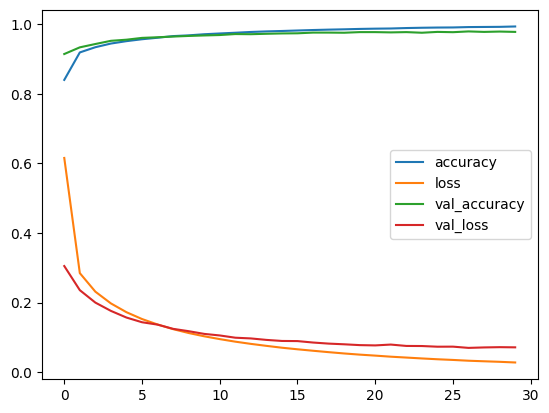

In [58]:
df.plot()

In [59]:
model_clf.evaluate(x_test,y_test)
## it shows 97 percentage of accuracy during the training of the dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9734 - loss: 0.0855


[0.07232505083084106, 0.9779999852180481]

### sample check test data

In [75]:
x_new=x_test[:3]
x_new[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [76]:
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

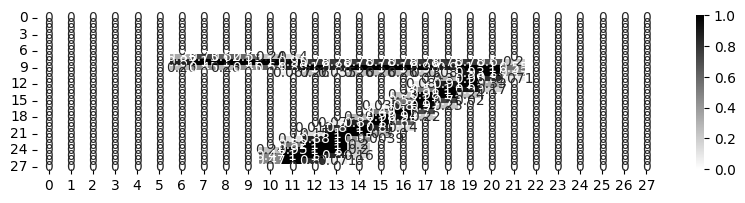

In [77]:
### visualize the image
plt.figure(figsize=(10,2))
sns.heatmap(x_test[0],annot=True,cmap="binary")

<Axes: >

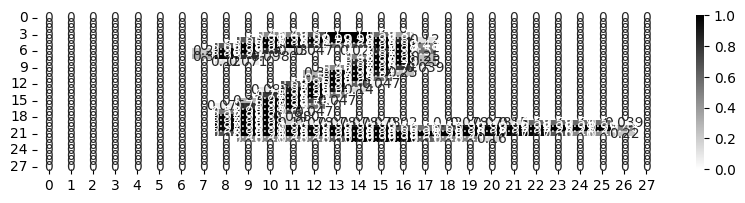

In [78]:
plt.figure(figsize=(10,2))
sns.heatmap(x_test[1],annot=True,cmap="binary")

<Axes: >

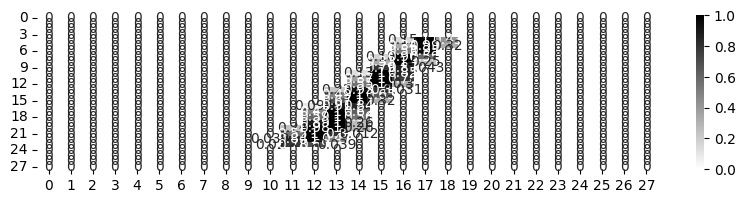

In [79]:
plt.figure(figsize=(10,2))
sns.heatmap(x_test[2],annot=True,cmap="binary")

In [80]:
### there are 3 images ,we have to predict weather the model will predict the right elemenyt or not

In [81]:
y_pred=model_clf.predict(x_new)
y_pred.round(3)

## the first array represents all the elements is 0 except the 7th element
## the second array represents all the elements is 0 except the 2nd elemnt
## the third srray shows the all the elements is 0 except the  first index element)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [82]:
### the predicted value
y_pred=np.argmax(y_pred,axis=-1)
y_pred  ### the array shows the index position /probability max term

array([7, 2, 1], dtype=int64)

In [87]:
actual

array([7, 2, 1], dtype=uint8)

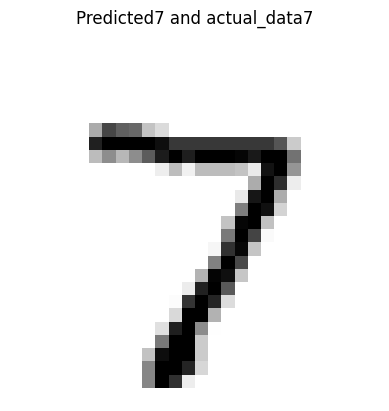

###############


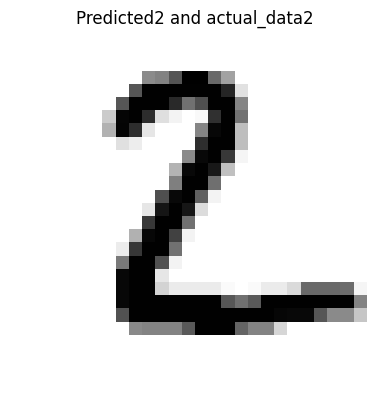

###############


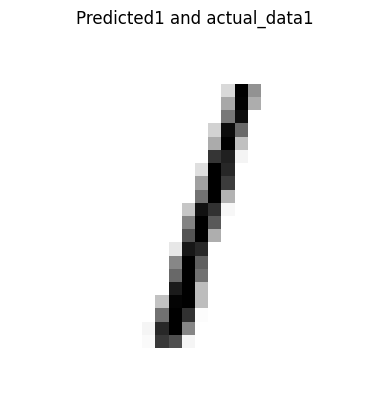

###############


In [88]:
for data,pred,actual_data in zip(x_new,y_pred,actual):
    plt.imshow(data,cmap="binary")
    plt.title(f"Predicted{pred} and actual_data{actual_data}")
    plt.axis("off")
    plt.show()
    print("###############")

In [83]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

## define the model
model=Sequential()
model.add(Dense(units=64,activation="relu",input_dim=100))
model.add(Dense(units=10,activation="softmax"))

C:\Users\chinm\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
